# Read Me
This notebook outlines how to use Catboost algorithm to conduct classification problem. 
This is the version 2 for Bank_churn dataset and it has improved the accuracy from 0.88 -> 0.89

The main difference comparing to model_v1:
1. Used Catboost algorithm only in this notebook, inspired by the discussion in the competition: https://www.kaggle.com/competitions/playground-series-s4e1/discussion/472502
2. Used three options to cross validate and fine tune the Catboost model to maximize the result

**Please note the Step 1 -> Step 4 are the same comparing to model_v1.**

### What is Catboost 
Catboost is a open-source library developed by Yandex. It's a variant of gradient boosting model that can handle both categorical and numerical features.
Key features of Catboost:
1. Built-in method for handelling categorical features, e.g no need to use one-hot-encoder anymore
2. Built-in method for handling missing values
3. Built-in cross-validation -> the CV class

# Step 1: Answering the question


#### This project is derived from Kaggle competition. The project is called Bank Churn. The goal is to identify which customer has churned. This is a binary classification problem

# Step 2: Checking Data

In this step, you will:

* Import dataset
* Checking data quality
  * Is there any missing data
  * Is there any duplicates?
  * what are the data types
  * what are the distributions of the data
  * Do we need to remove or fix any data?
* Basic understanding of the dataset
  * The columns
  * Size of the datasets
  * what columns are categorical, what columns are numeircal 

Anything else you can think of



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/var/folders/08/0mmxpjds48s_7kghtt0p4y9c0000gn/T/ipykernel_31237/853616108.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
submission_data = pd.read_csv('test.csv') 
train_data = pd.read_csv('train.csv')

In [4]:
print("The columns of test dataset are:")
print(submission_data.columns)

The columns of test dataset are:
Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [5]:
print("The columns of train dataset are:")
print(train_data.columns)

The columns of train dataset are:
Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


### Look at training dataset first

In [6]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
train_data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


##### from above information, we can see that:
1. There are no missing values 
2. The data type for all the features are correct
3. We possibily don't need the Id column nor the customer id columb for modelling

# Step 3: Tidying the data

This step is to fix all the problems we have seen from last steps. 

As what we saw in the last step, the data are very clean, so we don't need to tidy up the data here

# Step 4: EDA

In this step, we will do some analysis on the dataset to understand some key information of the data.

You can check:
* Distributions
* Correlations
* Key drivers for solving the problem
* or anything else you want to analyze on

Lets first look at how many people are churned

The percentage of exited customers is: 21.16%


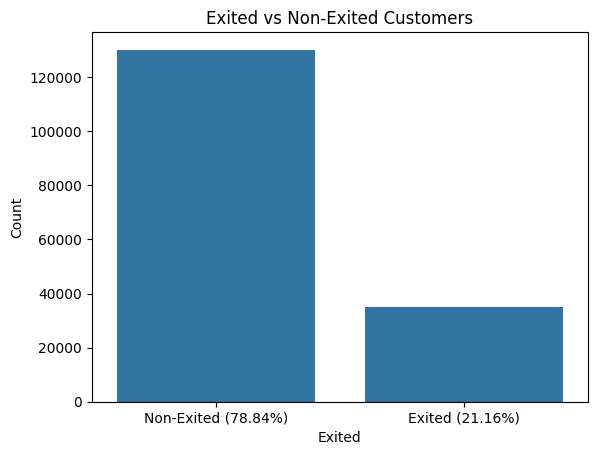

In [9]:
sns.countplot(data=train_data, x='Exited')

exited_percentage = train_data.loc[train_data['Exited'] == 1].shape[0] / train_data.shape[0] * 100
non_exited_percentage = 100 - exited_percentage
print("The percentage of exited customers is: {:.2f}%".format(exited_percentage))

# adding percentage to the graph
plt.title('Exited vs Non-Exited Customers')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Exited ({:.2f}%)'.format(non_exited_percentage), 'Exited ({:.2f}%)'.format(exited_percentage)])

# plotting the graph
plt.show()

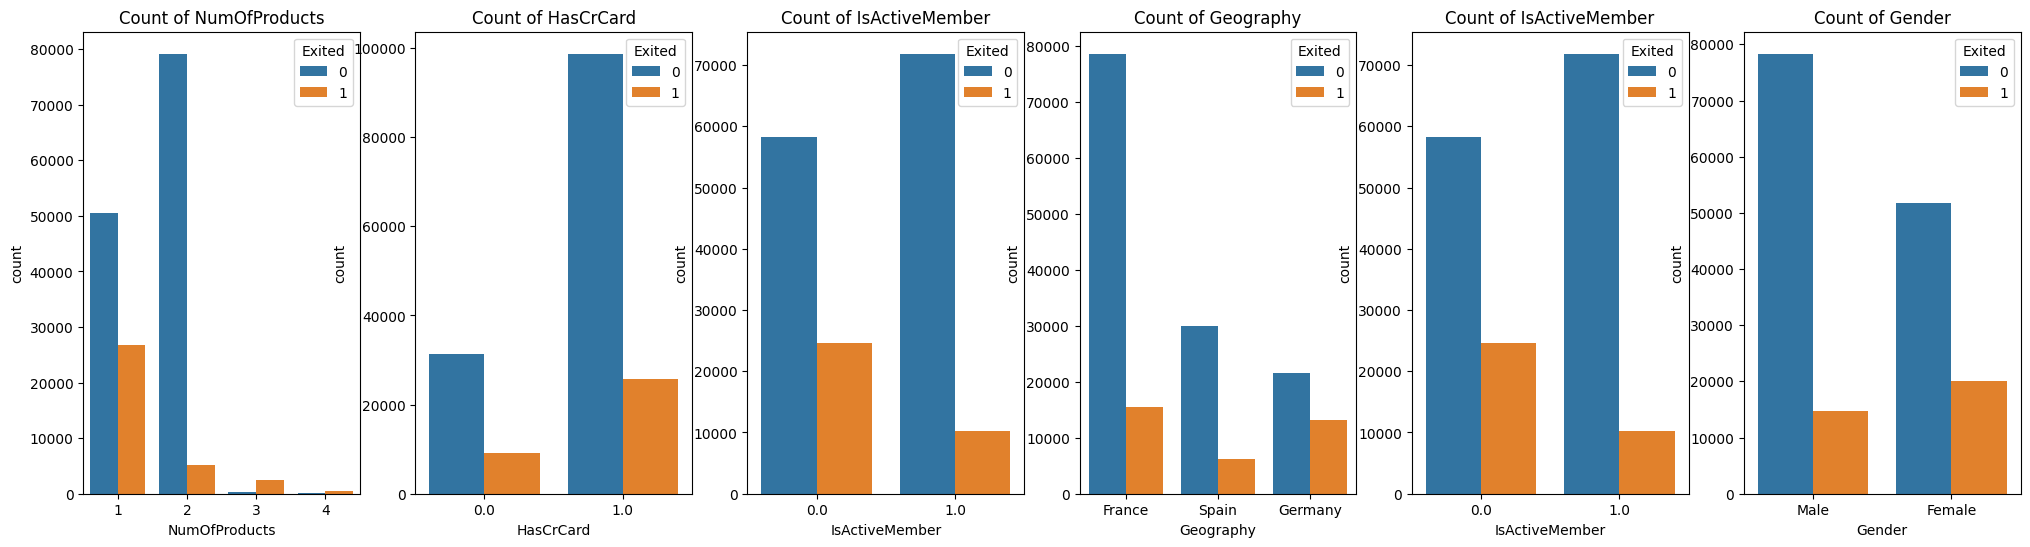

In [10]:
col_count = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Geography', 'IsActiveMember', 'Gender']

fig, ax = plt.subplots(1, 6, figsize=(25, 6))
for col in enumerate(col_count):
    sns.countplot(data=train_data, x=col[1], hue='Exited', ax=ax[col[0]])
    ax[col[0]].set_title('Count of {}'.format(col[1]))

##### We looked at a few features above, we can see that:
1. Regarding to geography, Germany seems to have more churned customers for the amount of customer they had. France has the most custoemrs
2. Regarding to Tensure, just from this countplot, it's hard to gain the insights, we will need to replot to understand the relationship between tenure and churn
3. Number of products: seems like when customer only has 2 products, it's less likely to churn (this is kinda weird). Customers who have 3-4 products are churned more 
4. we can see there are more customers having credit cards, and they might churn less according to the percentage
5. can't see clearly if active customers are less likely to churn using the countplot
6. There are more male customers, however female customers are more likely to churn

##### Before we dive into the features above, lets look at the consistency data first

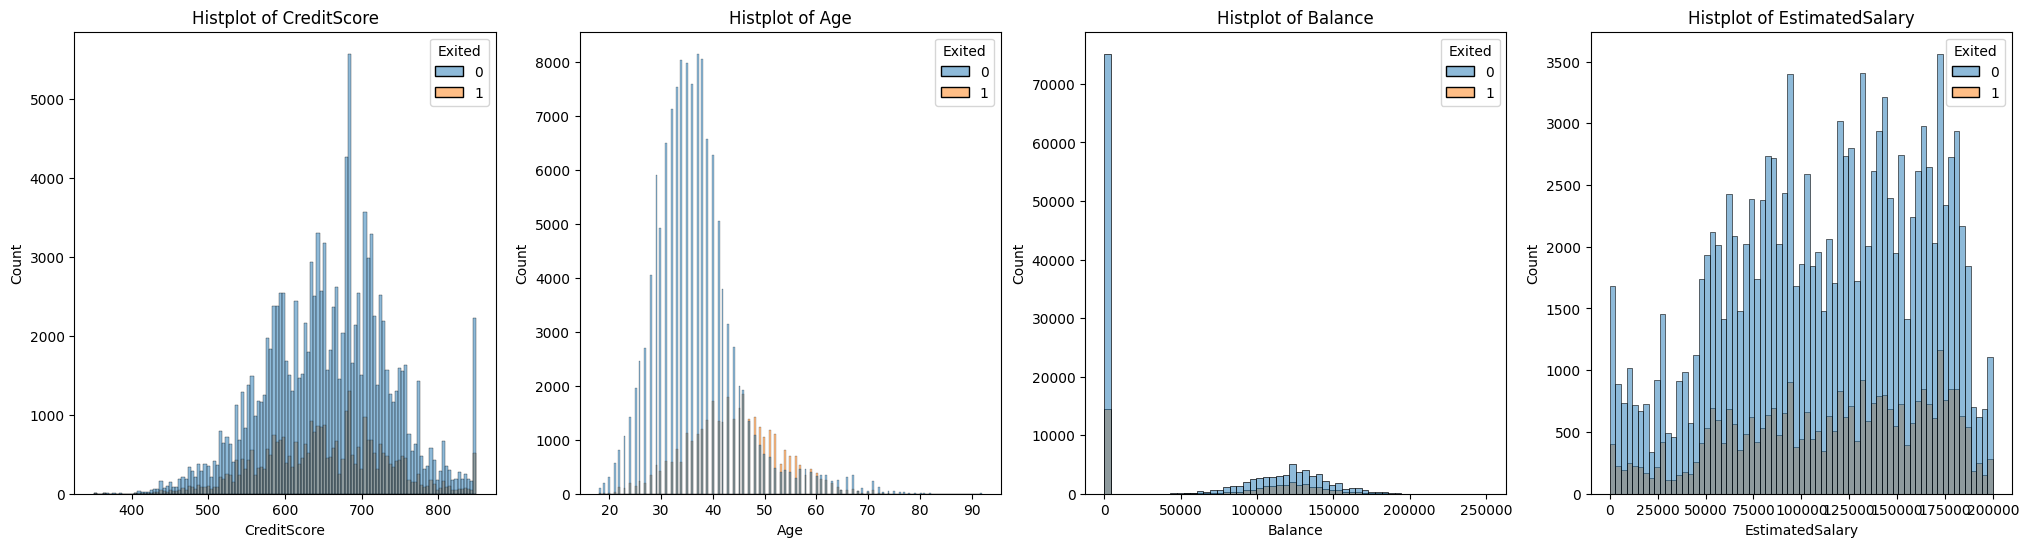

In [11]:
num_col_plot = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
fig, ax = plt.subplots(1, 4, figsize=(25,6))
for col in enumerate(num_col_plot):
    sns.histplot(data=train_data, x=col[1], ax=ax[col[0]], hue='Exited')
    ax[col[0]].set_title('Histplot of {}'.format(col[1]))
plt.show()

##### We looked at these continous features above, we can see that:
1. Credit score so far doesn't look like that the lower the higher churn. Need to understand more
2. It looks like there are a lot of 45+ people churn. In fact 45 -> 70
3. As of balance, there are a lot of people have balance of 0. But it doesn't indicate that it's more likely to churn
4. For the salary indicator, it's not obvious which group is more likely to churn

##### After plotting all the features, there are some features that provide obvious churn information:
1. Age, 45 - 70 age group seesm to churn more
2. Customers in Germany churned more than France and Spain
3. Customers who have only 2 products seem to churn less and Customers who have 3-4 products are churned more 
4. Customers who have credit cards churned less
5. Female customers seem to churn more

##### Now lets plot the heatmap of the correlation of different features

In [12]:
train_data['gender_number'] =  train_data.replace({'Male':0, 'Female':1})['Gender']

train_data['geography_number'] =  train_data.replace({'France':0, 'Germany':1, 'Spain':2})['Geography']

/var/folders/08/0mmxpjds48s_7kghtt0p4y9c0000gn/T/ipykernel_31237/1207814139.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['gender_number'] =  train_data.replace({'Male':0, 'Female':1})['Gender']
/var/folders/08/0mmxpjds48s_7kghtt0p4y9c0000gn/T/ipykernel_31237/1207814139.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data['geography_number'] =  train_data.replace({'France':0, 'Germany':1, 'Spain':2})['Geography']


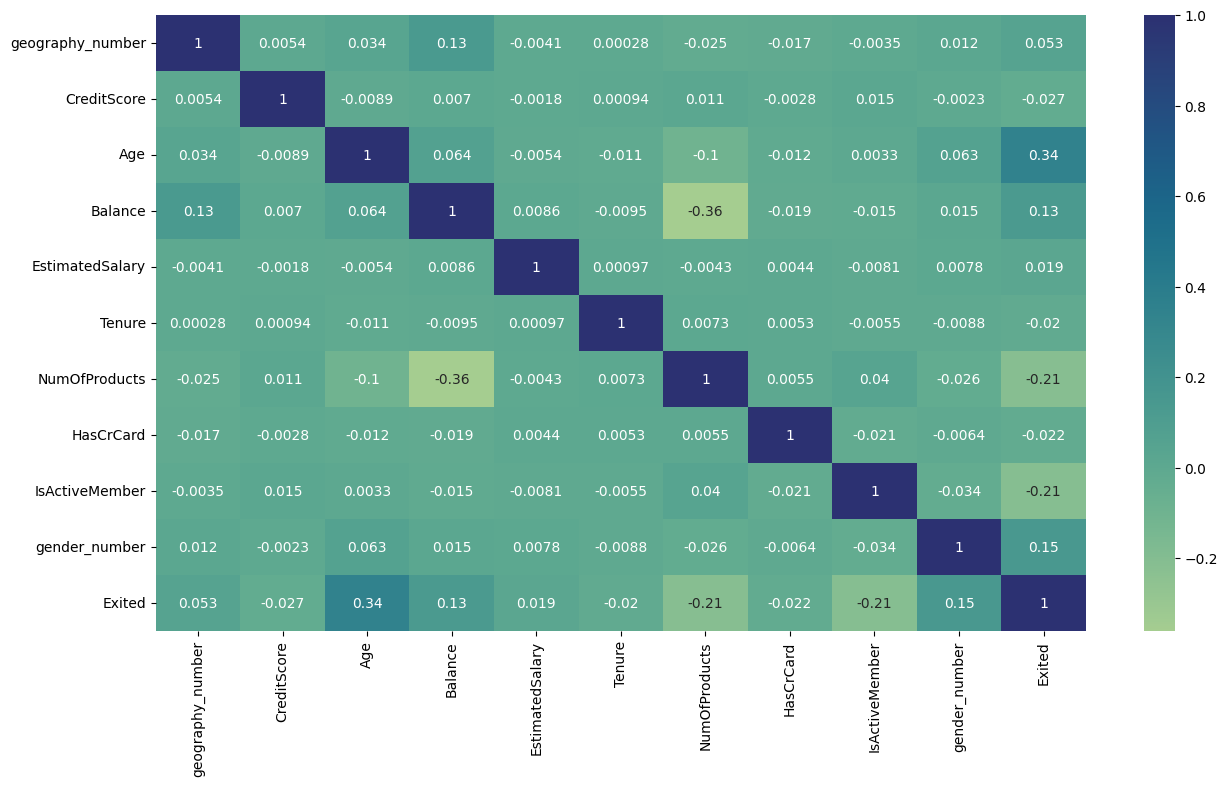

In [13]:
fig, ax = plt.subplots(figsize=(15,8))
features_for_corr = ['geography_number', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'gender_number','Exited']
sns.heatmap(train_data[features_for_corr].corr(), annot=True, cmap='crest')
plt.show()

From the correlation heatmap, we can see that Age is the highest correlated (positive) feature amongest all the features.
then Number of products and is active customer (negative)

Age >> Number of products = is active (negative) >> gender >> balance 

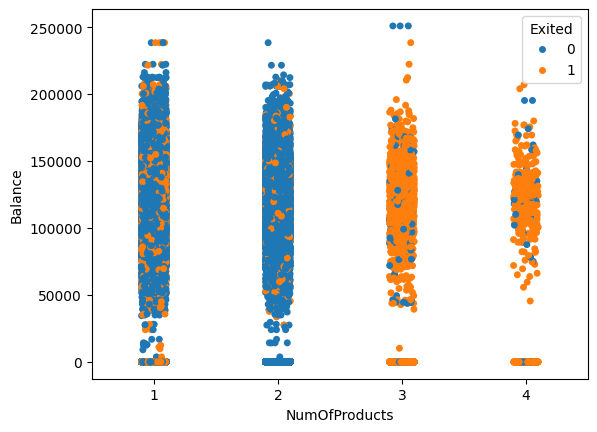

In [14]:
sns.stripplot(x='NumOfProducts', y='Balance', data=train_data, hue='Exited')
plt.show()

We are seeing a -0.36 correlation with balance and number of products in the heatmap. Lets draw out the distrubition as above strip plot. We can see that`; Higher balance doesn't seem to have more than 2 products. Maybe that's why it's given the higher correlation. 

Maybe we can combine the two features in the modelling

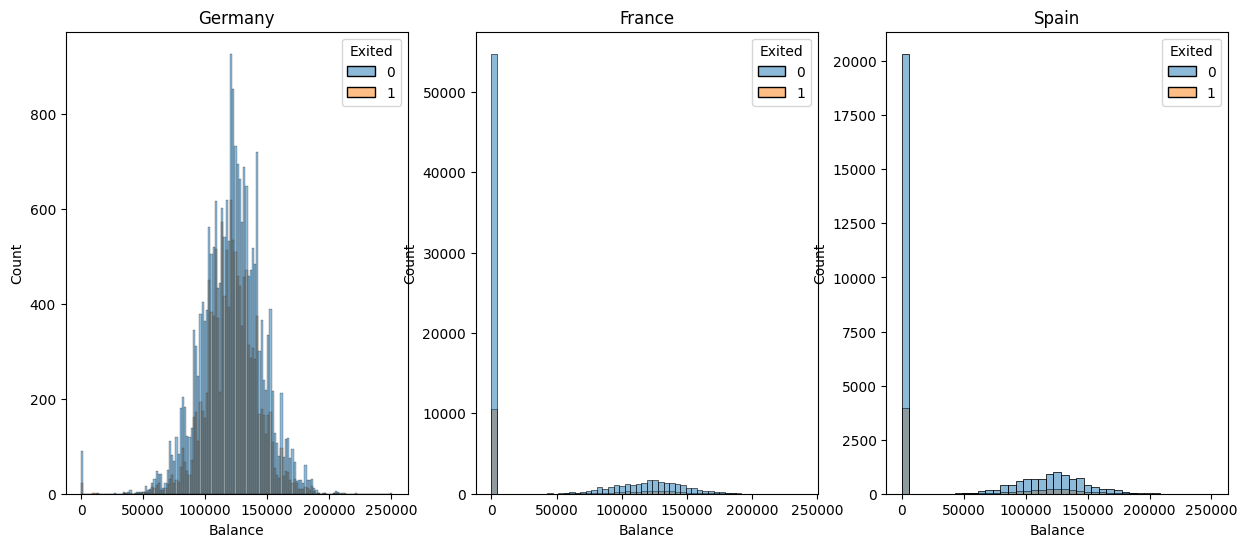

In [15]:
# we saw that balance and gerography is somewhat correlated. we can plot what it is looks like
fig, ax = plt.subplots(1, 3, figsize=(15,6))
sns.histplot(x=train_data.loc[train_data['Geography'] == 'Germany'].Balance, data=train_data, hue='Exited', ax=ax[0])
sns.histplot(x=train_data.loc[train_data['Geography'] == 'France'].Balance, data=train_data, hue='Exited', ax=ax[1])
sns.histplot(x=train_data.loc[train_data['Geography'] == 'Spain'].Balance, data=train_data, hue='Exited', ax=ax[2])

ax[0].set_title('Germany')
ax[1].set_title('France')
ax[2].set_title('Spain')
plt.show() 

From above we can see Germany has really high balance, and they churn a lot. Maybe the churn for Germany is more related to the balance situation rather than the geography (we don't know).

##### In summary:
for the key metrics, the leading metrics to churn can be:
Age >> Number of products = is active (negative) >> gender >> balance 

We can also engineer some features to improve the performance:
1. Number of products with balance
2. Geography with balance

In [16]:
## look a bit at surname to see if there is any trends. It's harder to understand though,but we can plot the top surnames and have a look.
top_100_name = train_data['Surname'].value_counts().sort_values(ascending=False).head(50).index.to_list()

# write a code to replace all the name except top 100 with 'Other' using lambada function
train_data['SurnameGrouped'] = train_data['Surname'].apply(lambda x: x if x in top_100_name else 'Other')

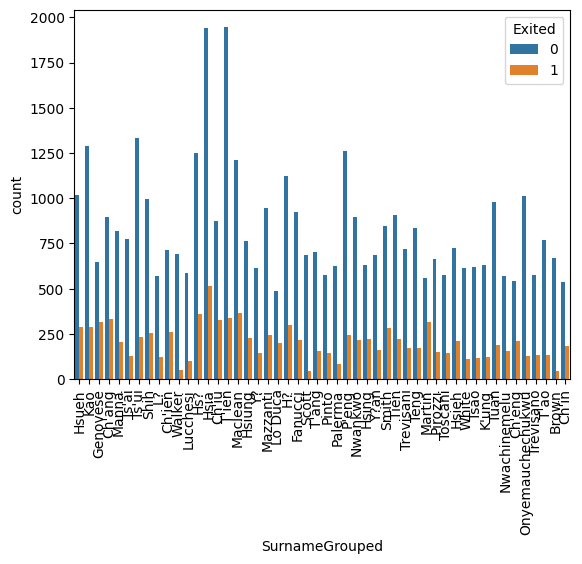

In [17]:
sns.countplot(x='SurnameGrouped', hue='Exited', data=train_data.loc[train_data['SurnameGrouped'] != 'Other'])
plt.xticks(rotation=90)
plt.show()

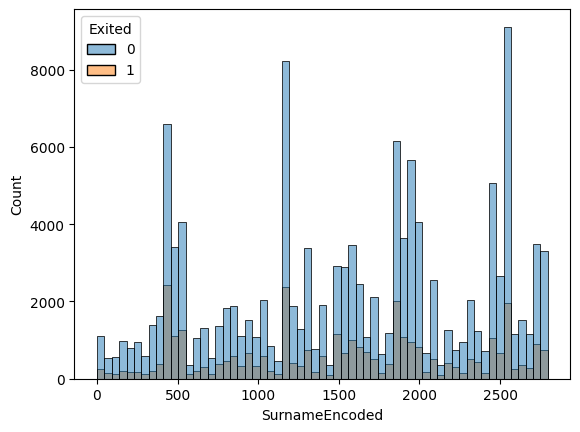

In [18]:
# we can also encode the surname to make it numerical and see what it looks like
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_data['SurnameEncoded'] = label_encoder.fit_transform(train_data['Surname'])

sns.histplot(x='SurnameEncoded', data=train_data, hue='Exited')
plt.show()

##### The above doesn't really give much useful information about surname. However we can keep surname and use Catboost model to test.

# Step 5: Modelling

In this step, you will use ML to predict the dataset. 

In [19]:
train_data.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,gender_number,geography_number,SurnameGrouped,SurnameEncoded
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,0,Other,1924
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,0,Other,1925
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,0,Hsueh,1178
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,0,Kao,1299
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,2,Other,467


In [20]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
import numpy as np

# import catboost
from catboost import CatBoostClassifier, Pool, cv, metrics

In [21]:
# rearrange the columns of the dataframe -> mainly to make it easier to encode the columns
cols = ['Geography', 'Gender', 'NumOfProducts', 'Tenure', 'HasCrCard', 'IsActiveMember', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Surname', 'CustomerId']

train_data_X = train_data[cols]
train_data_y = train_data['Exited']
submission_data = submission_data[cols]
train_data_X.head()

,Geography,Gender,NumOfProducts,Tenure,HasCrCard,IsActiveMember,CreditScore,Age,Balance,EstimatedSalary,Surname,CustomerId
0,France,Male,2,3,1.0,0.0,668,33.0,0.00,181449.97,Okwudilichukwu,15674932
1,France,Male,2,1,1.0,1.0,627,33.0,0.00,49503.50,Okwudiliolisa,15749177
2,France,Male,2,10,1.0,0.0,678,40.0,0.00,184866.69,Hsueh,15694510
3,France,Male,1,2,1.0,1.0,581,34.0,148882.54,84560.88,Kao,15741417
4,Spain,Male,2,5,1.0,1.0,716,33.0,0.00,15068.83,Chiemenam,15766172


In [22]:
X_train, X_test, y_train, y_test = train_test_split(train_data_X, train_data_y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((132027, 12), (132027,), (33007, 12), (33007,))

### Preprocessing the data

In [23]:
submission_data.head()

,Geography,Gender,NumOfProducts,Tenure,HasCrCard,IsActiveMember,CreditScore,Age,Balance,EstimatedSalary,Surname,CustomerId
0,France,Female,2,2,0.0,1.0,586,23.0,0.00,160976.75,Lucchese,15773898
1,France,Female,1,2,1.0,0.0,683,46.0,0.00,72549.27,Nott,15782418
2,France,Female,2,7,1.0,0.0,656,34.0,0.00,138882.09,K?,15807120
3,France,Male,1,8,1.0,0.0,681,36.0,0.00,113931.57,O'Donnell,15808905
4,Germany,Male,1,10,1.0,0.0,752,38.0,121263.62,139431.00,Higgins,15607314


In [24]:

# set the format of numpy array to 2 decimal places
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

# one hot encoding the categorical fields
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 2])], remainder='passthrough')
# standard scaling the numerical fields
sc = ColumnTransformer(transformers=[('scaler', StandardScaler(), [13, 14, 15])], remainder='passthrough')

X_train = ct.fit_transform(X_train)
X_train = sc.fit_transform(X_train)

# fit test data and submission data
X_test = ct.transform(X_test)
X_test = sc.transform(X_test)
submission_data = ct.transform(submission_data)
submission_data = sc.transform(submission_data)

X_train

array([[0.324586134119284, -0.8846562249077013, -0.18145448175616066,
        ..., 679, 'Yobachukwu', 15780088],
       [0.8882987396294837, 0.9569606796338417, -0.19359143636019832,
        ..., 721, 'Slattery', 15679760],
       [-0.35186899249295556, -0.8846562249077013, 0.8495380319634485,
        ..., 551, 'Ma', 15637678],
       ...,
       [0.09910109191520416, -0.8846562249077013, 1.0997422093986668,
        ..., 753, "T'ien", 15573741],
       [1.1137837818335636, -0.8846562249077013, -1.7440927077217825,
        ..., 685, 'Bell', 15754574],
       [-0.35186899249295556, 1.2731018138498473, 0.5460702089646813,
        ..., 667, 'Nnaife', 15790489]], dtype=object)

In [25]:
X_train.shape, submission_data.shape, X_test.shape

((132027, 18), (110023, 18), (33007, 18))

In [26]:
# after encoding, the column headers are lost, but we can print out the feature names to understand which column is what
ct.get_feature_names_out()

array(['encoder__Geography_France', 'encoder__Geography_Germany',
       'encoder__Geography_Spain', 'encoder__Gender_Female',
       'encoder__Gender_Male', 'encoder__NumOfProducts_1',
       'encoder__NumOfProducts_2', 'encoder__NumOfProducts_3',
       'encoder__NumOfProducts_4', 'remainder__Tenure',
       'remainder__HasCrCard', 'remainder__IsActiveMember',
       'remainder__CreditScore', 'remainder__Age', 'remainder__Balance',
       'remainder__EstimatedSalary', 'remainder__Surname',
       'remainder__CustomerId'], dtype=object)

### Modelling

For this notebook, we will use Catboost model only.

In [27]:
cat_model = CatBoostClassifier(
    eval_metric='AUC',
    random_seed=42,
    logging_level='Silent'
)

In [28]:
# convert float data type to int for the categorical fields in catboost
X_train[:, 4:15] = X_train[:, 4:15].astype(int)
X_test[:, 4:15] = X_test[:, 4:15].astype(int)
submission_data[:, 4:15] = submission_data[:, 4:15].astype(int)

In [29]:
submission_data[1, :]

array([0.8882987396294837, -0.8846562249077013, -0.7982913956085338, 1.0,
       0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 683, 'Nott', 15782418],
      dtype=object)

In [30]:
cal_column = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [31]:
# fit the model
# please note that when eval_set is defined, the model will use the validation dataset to identify the iteration with the optimal value of the metric specified in  --eval-metric
cat_model.fit(X_train, y_train, cat_features=cal_column, eval_set=(X_test, y_test), plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

#### Option 1: lets try fine tune the model using cv function Catboost already have

In [40]:
# combine x_train and x_test for cross validation

X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

In [215]:
cv_params = cat_model.get_params()
cv_params.update({'loss_function': metrics.Logloss()})

train_pool = Pool(X, y, cat_features=cal_column)

cv_results = cv(train_pool, cv_params, fold_count=10)

# # get best iteration
# best_iteration = cv_results['iterations']

In [220]:
best_params = cv_params.copy()
best_params.update({'use_best_model':True})

best_params

{'random_seed': 42,
 'logging_level': 'Silent',
 'eval_metric': 'AUC',
 'loss_function': Logloss(use_weights=True [mandatory=False]),
 'use_best_model': True}

In [221]:
# lets re-train the model with the best iteration after cross validation
cat_model.fit(X, y, cat_features=cal_column, plot=True)


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [222]:
## make predictions
submission_pred = cat_model.predict_proba(submission_data)
submission_pred2 = cat_model.predict(submission_data)

In [223]:
submission_pred2

array([0, 1, 0, ..., 0, 0, 0])

In [224]:
submission_pred

array([[0.99, 0.01],
       [0.21, 0.79],
       [0.99, 0.01],
       ...,
       [0.99, 0.01],
       [0.85, 0.15],
       [0.85, 0.15]])

In [225]:
submission = pd.read_csv('test.csv')
submission['Exited'] = submission_pred[:, -1]

submission[['id', 'Exited']].to_csv('submission_catboost.csv', index=False)

##### Feature importance

In [247]:
import re 

# the feature names changed after scaling, and the scaling feature name is not the same as the original feature name. We can use some regex to get the original feature name
f_list = sc.get_feature_names_out().tolist()
# The feature names was kept as the same as the original feature names after encoding, we can use them as reference.
feature_name = ct.get_feature_names_out()

# get the index of the columns
index = []
for str in f_list:
    index.append(int(re.search(r'\d+', str).group(0)))

# get the features according to the index
features = []
for i in index:
    features.append(feature_name[i])

features

['remainder__Age',
 'remainder__Balance',
 'remainder__EstimatedSalary',
 'encoder__Geography_France',
 'encoder__Geography_Germany',
 'encoder__Geography_Spain',
 'encoder__Gender_Female',
 'encoder__Gender_Male',
 'encoder__NumOfProducts_1',
 'encoder__NumOfProducts_2',
 'encoder__NumOfProducts_3',
 'encoder__NumOfProducts_4',
 'remainder__Tenure',
 'remainder__HasCrCard',
 'remainder__IsActiveMember',
 'remainder__CreditScore',
 'remainder__Surname',
 'remainder__CustomerId']

In [248]:
# lets check the feature importance

feature_importance = cat_model.get_feature_importance(prettified=True)
feature_importance = feature_importance.astype(float).sort_values(by='Feature Id')

feature_importance = pd.DataFrame({'Feature': features, 'Feature Id': feature_importance['Feature Id'], 'Importance': feature_importance['Importances']})
feature_importance.sort_values(by='Importance', ascending=False)

,Feature,Feature Id,Importance
0,remainder__Age,0.0,22.443426
1,encoder__NumOfProducts_2,9.0,15.617792
2,remainder__Surname,16.0,10.558802
3,remainder__Balance,1.0,9.641721
4,remainder__IsActiveMember,14.0,8.690470
5,remainder__CustomerId,17.0,5.885777
6,remainder__CreditScore,15.0,5.174943
7,encoder__Geography_Germany,4.0,5.102384
8,remainder__EstimatedSalary,2.0,5.074118
9,encoder__NumOfProducts_1,8.0,3.362125


#### Option2: Now we will try to use the sklearn cross validation method to cross validate the model

In [45]:
# as the classficication is imbalanced, we can use the stratified kfold to split the data 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score


In [44]:
n_fold = 10
# here we are using stratified kfold because the data is imbalanced
kfold = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
# lets test if the folds are stratified
for train_index, test_index in kfold.split(X, y):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    train_0, train_1 = len(y_train[y_train == 0]), len(y_train[y_train == 1])
    test_0, test_1 = len(y_test[y_test == 0]), len(y_test[y_test == 1])
    print("Train - 0: {}, 1: {}, Test - 0: {}, 1: {}".format(train_0, train_1, test_0, test_1))

Train - 0: 117101, 1: 31429, Test - 0: 13012, 1: 3492
Train - 0: 117101, 1: 31429, Test - 0: 13012, 1: 3492
Train - 0: 117101, 1: 31429, Test - 0: 13012, 1: 3492
Train - 0: 117102, 1: 31428, Test - 0: 13011, 1: 3493
Train - 0: 117102, 1: 31429, Test - 0: 13011, 1: 3492
Train - 0: 117102, 1: 31429, Test - 0: 13011, 1: 3492
Train - 0: 117102, 1: 31429, Test - 0: 13011, 1: 3492
Train - 0: 117102, 1: 31429, Test - 0: 13011, 1: 3492
Train - 0: 117102, 1: 31429, Test - 0: 13011, 1: 3492
Train - 0: 117102, 1: 31429, Test - 0: 13011, 1: 3492


In [264]:
# run cross validation using catboost. The idea is we will train the model on the 10 folds and then predict the submission data, then average the prediction
cv_params = cat_model.get_params()
cv_params.update({'loss_function': metrics.Logloss()})
roc_score = []
submission_pred_cv = np.empty((n_fold, len(submission_data)))

for fold_index, (train_index, test_index) in enumerate(kfold.split(X, y)):
    '''The model is being trained on the 10 folds..,'''
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    train_pool = Pool(X_train_fold, y_train_fold, cat_features=cal_column)
    test_pool = Pool(X_test_fold, y_test_fold, cat_features=cal_column)

    cat_model = CatBoostClassifier(**cv_params)
    cat_model.fit(train_pool, eval_set=test_pool, plot=True)

    # get the roc score of each fold
    y_pred = cat_model.predict_proba(X_test_fold)[:, -1]
    roc = roc_auc_score(y_test_fold, y_pred)
    roc_score.append(roc)
    print(f"AUC for fold {fold_index} is: {roc}")

    # predit the submission data
    submission_pred = cat_model.predict_proba(submission_data)[:, -1]
    submission_pred_cv[fold_index, :] = submission_pred
    print(f'-----completed fold {fold_index}-----')




MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

AUC for fold 0 is: 0.8959175361609991
-----completed fold 0-----


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

AUC for fold 1 is: 0.8969896586779178
-----completed fold 1-----


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

AUC for fold 2 is: 0.9002859154770873
-----completed fold 2-----


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

AUC for fold 3 is: 0.8961703945237995
-----completed fold 3-----


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

AUC for fold 4 is: 0.8965057586747244
-----completed fold 4-----


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

AUC for fold 5 is: 0.8997448013633368
-----completed fold 5-----


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

AUC for fold 6 is: 0.8961720248519998
-----completed fold 6-----


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

AUC for fold 7 is: 0.9017540493315948
-----completed fold 7-----


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

AUC for fold 8 is: 0.9021607234622073
-----completed fold 8-----


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

AUC for fold 9 is: 0.898463900006013
-----completed fold 9-----


In [276]:
print(f'The average auc score is {np.mean(roc_score)}')

The average auc score is 0.898416476252968


In [273]:
# average the prediction of the submission data to get the final prediction
avg_subm_pred_mean = np.mean(submission_pred_cv, axis=0)
avg_subm_pred_mean.shape

In [278]:

submission = pd.read_csv('test.csv')
submission['Exited'] = avg_subm_pred_mean

submission[['id', 'Exited']].to_csv('submission_catboost2.csv', index=False)

#### Option 3: use Hyperopt + cross validation to fine tune

Hyperopt is a liabrary for hyperparameter optimization. Gridsearch is a very common one to use for hyperparamter tunning but it can take long time. Here we will try Hyperopt

According to Catboost documentation, the hyper-parameters of l2_reaf_reg and learning rate the are important.
So we will fine tune these two hyper-parameters

In [34]:
import hyperopt

In [41]:
def hyperopt_objective(params):
    '''The objective function to be minimised by hyperopt. The function will be used to find the best hyperparameters for the model. 
    This function will be used by the hyperopt fmin function as below'''
    cat_model = CatBoostClassifier(
        l2_leaf_reg = params['l2_leaf_reg'],
        learning_rate = params['learning_rate'],
        iterations = 500,
        eval_metric = 'AUC',
        cat_features = cal_column,
        random_seed = 42,
        logging_level = 'Silent',
        loss_function = 'Logloss'
    )
    # cross validation
    cv_pool = Pool(X, y, cat_features=cal_column)
    cv_params = cat_model.get_params()
    cv_result = cv(cv_pool, cv_params, fold_count=10)

    # get the best auc score
    best_auc = cv_result['test-AUC-mean'].max()
    # as hyperopt minimises the objective function, we will return 1 - best_auc
    return 1 - best_auc 

In [43]:
# define the search space. The search space is the range of values that hyperopt will search to find the best parameters
space = {
    'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 0.01, 0.5)
}

trials = hyperopt.Trials()

# run the hyperopt search
best_result = hyperopt.fmin(
    hyperopt_objective,
    space=space,
    algo=hyperopt.tpe.suggest,
    max_evals=50,
    trials=trials,
    rstate=np.random.default_rng(seed=42)
)

print(best_result)

100%|██████████| 2/2 [14:40<00:00, 440.34s/trial, best loss: 0.10165747436359429]
{'l2_leaf_reg': 3.0, 'learning_rate': 0.1572064638473491}


In [45]:
# retrain the model with the best hyperparameters and cross validate again
cat_model = CatBoostClassifier(
    l2_leaf_reg = best_result['l2_leaf_reg'],
    learning_rate = best_result['learning_rate'],
    iterations = 500,
    eval_metric = 'AUC',
    cat_features = cal_column,
    random_seed = 42,
    logging_level = 'Silent',
    loss_function = 'Logloss'
)

cv_data = cv(Pool(X, y, cat_features=cal_column), cat_model.get_params(), fold_count=10, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [47]:
# retrain model with tuned model
cat_model.fit(X, y, cat_features=cal_column, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [49]:
submission_pred = cat_model.predict_proba(submission_data)

In [50]:
# make predictions
submission = pd.read_csv('test.csv')
submission['Exited'] = submission_pred[:, -1]

submission[['id', 'Exited']].to_csv('submission_catboost3.csv', index=False)
